In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import plotly.express as px

In [49]:
mistral_frame = pd.read_csv('../processed_data/cc_mistral_ratings.csv')
chatgpt_frame = pd.read_csv('../processed_data/gptrated_frame.csv')

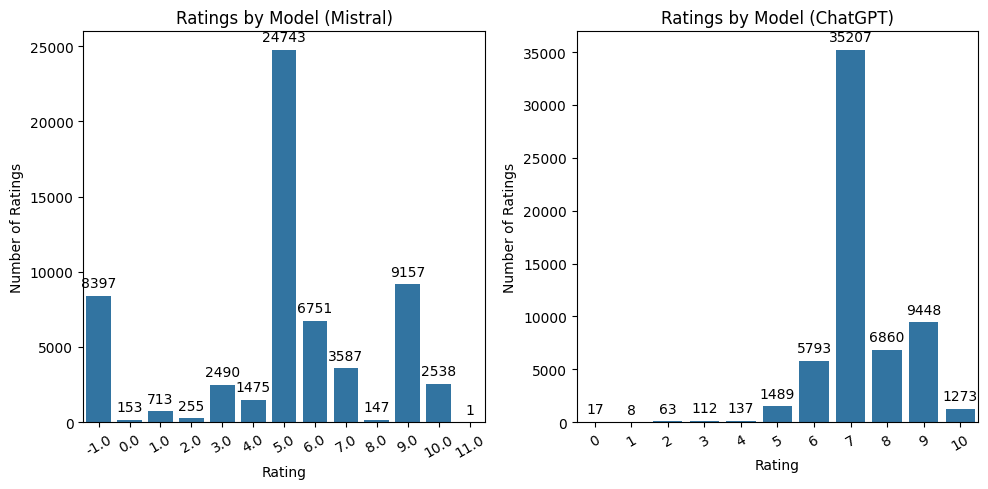

In [50]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=mistral_frame, x='rating', ax=axs[0])
sns.countplot(data=chatgpt_frame, x='rating', ax=axs[1])

axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Number of Ratings')
axs[0].set_title('Ratings by Model (Mistral)')

axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Number of Ratings')
axs[1].set_title('Ratings by Model (ChatGPT)')

# show values on top of bars
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# rotate x labels by 30 degrees
for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [51]:
edstays = pd.read_csv('../raw_data/edstay_encounters.csv')

In [52]:
# remove mistral ratings with -1
mistral_frame = mistral_frame[mistral_frame['rating'] != -1]

In [53]:
# divide mistral and chatgpt ratings by 2 and floor them
mistral_frame['rating'] = mistral_frame['rating'] // 2
chatgpt_frame['rating'] = chatgpt_frame['rating'] // 2

In [54]:
# create new frame with mistral, chatgpt and edstay ratings
ratings_frame = pd.DataFrame()
ratings_frame['mistral'] = mistral_frame['rating']
ratings_frame['chatgpt'] = chatgpt_frame['rating']
ratings_frame['edstay'] = edstays['acuity']

# cast all to float
ratings_frame = ratings_frame.astype(float)

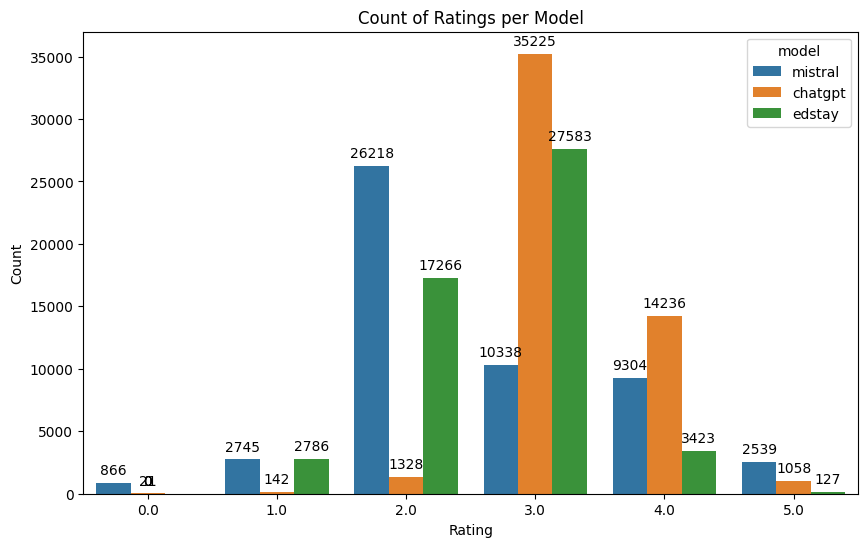

In [67]:
df_long = ratings_frame.melt(var_name='model', value_name='rating')

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df_long, x='rating', hue='model', dodge=True)

# Add some labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings per Model')

# show values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Show the plot
plt.show()